In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from matplotlib import pyplot as plt
# import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# import data
data = pd.read_csv('./data/train.csv')

In [4]:
data.shape

(19579, 3)

In [5]:
# extracting the number of examples of each class
EAP_len = data[data['author'] == 'EAP'].shape[0]
HPL_len = data[data['author'] == 'HPL'].shape[0]
MWS_len = data[data['author'] == 'MWS'].shape[0]

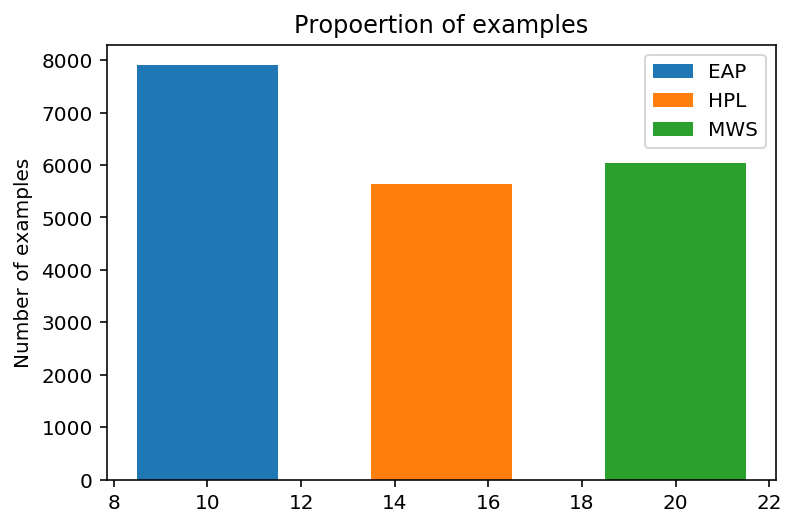

In [6]:
# bar plot of the 3 classes
plt.bar(10,EAP_len,3, label="EAP")
plt.bar(15,HPL_len,3, label="HPL")
plt.bar(20,MWS_len,3, label="MWS")
plt.legend()
plt.ylabel('Number of examples')
plt.title('Propoertion of examples')
plt.show()

# Feature Engineering

In [8]:
# removing functuation
def remove_punctuation(text):
    import string
    # replacing the puntuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [9]:
# apply the function to each examples
data['text'] = data['text'].apply(remove_punctuation)
data.head()

id                                               text author
0  id26305  This process however afforded me no means of a...    EAP
1  id17569  It never once occurred to me that the fumbling...    HPL
2  id11008  In his left hand was a gold snuff box from whi...    EAP
3  id27763  How lovely is spring As we looked from Windsor...    MWS
4  id12958  Finding nothing else not even gold the Superin...    HPL

In [14]:
# extract the stop words
# extracting the stopwords
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [15]:
print(f'Number of stopwords: {len(sw)}')

Number of stopwords: 179


In [16]:
# removing stopwords
def stopwords(text):
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [17]:
# apply the function to each examples
data['text'] = data['text'].apply(stopwords)
data.head()

id                                               text author
0  id26305  process however afforded means ascertaining di...    EAP
1  id17569         never occurred fumbling might mere mistake    HPL
2  id11008  left hand gold snuff box capered hill cutting ...    EAP
3  id27763  lovely spring looked windsor terrace sixteen f...    MWS
4  id12958  finding nothing else even gold superintendent ...    HPL

# Top words before stemming

In [18]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(data['text'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [19]:
# store the vocabulary and counts in a pandas dataframe
# lists to store the vocabulary and counts
vocab = []
count = []

# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)

# store the count in pandas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

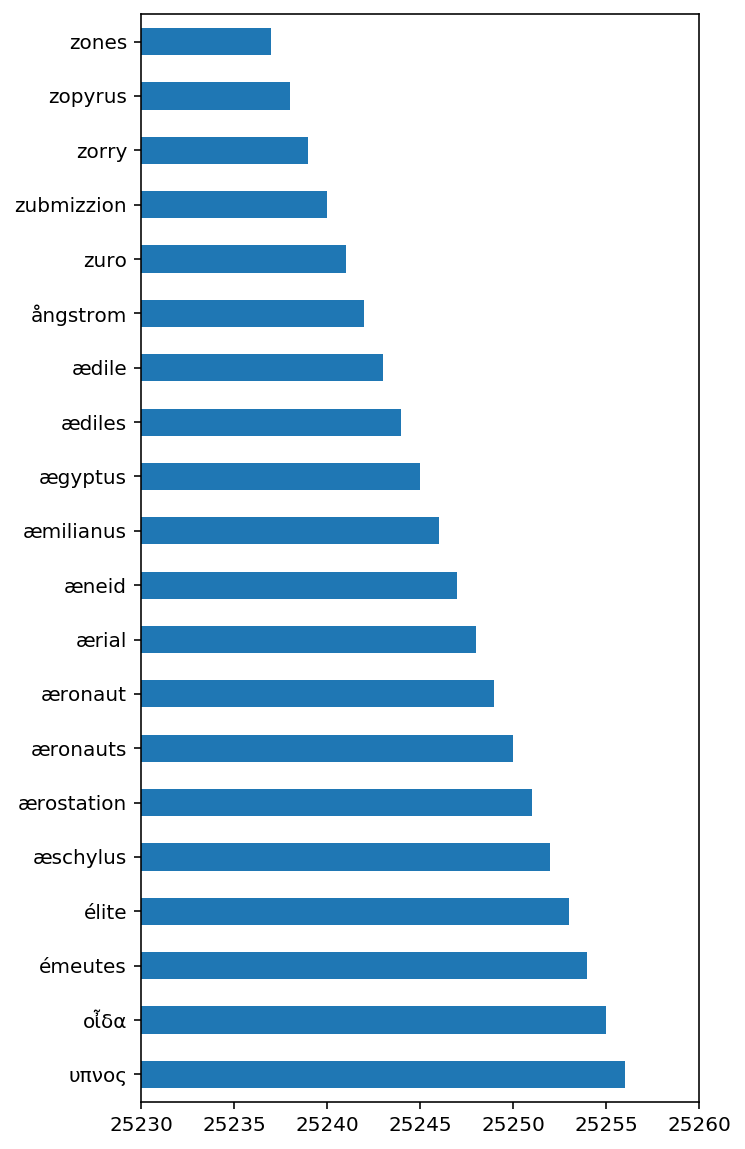

In [20]:
# top words
top_vocab = vocab_bef_stem.head(20)
top_vocab.plot(kind = 'barh', figsize = (5, 10), xlim = (25230, 25260))

# Stemming operations

In [21]:
# a function to carry out stemming operation
# create an object of stemming function
stemmer = SnowballStemmer('english')

def stemming(text):
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [22]:
# apply the fuction to each examples
data['text'] = data['text'].apply(stemming)
data.head()

id                                               text author
0  id26305  process howev afford mean ascertain dimens dun...    EAP
1  id17569                never occur fumbl might mere mistak    HPL
2  id11008  left hand gold snuff box caper hill cut manner...    EAP
3  id27763  love spring look windsor terrac sixteen fertil...    MWS
4  id12958  find noth els even gold superintend abandon at...    HPL

In [25]:
# top words after stemming operation
# collect vocabulary count
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer('english')
# fit the vectorizer using the text data
tfid_vectorizer.fit(data['text'])
# collect the vocabulary items user in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

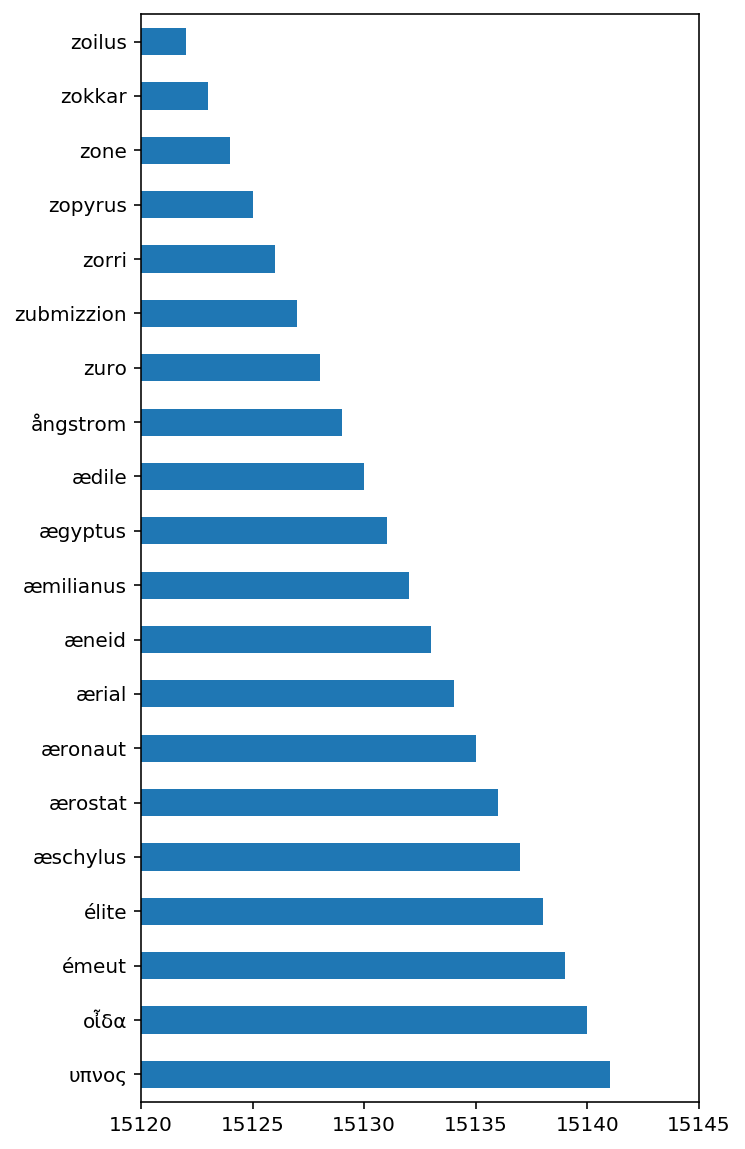

In [27]:
# lists to stor vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in pandas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
top_vocab = vocab_after_stem.head(20)
top_vocab.plot(kind = 'barh', figsize = (5, 10), xlim = (15120, 15145))

# histogram of text length of each writer

In [28]:
data['length'] = data['text'].apply(lambda x: len(x))
data.head()

id                                               text author  length
0  id26305  process howev afford mean ascertain dimens dun...    EAP     136
1  id17569                never occur fumbl might mere mistak    HPL      35
2  id11008  left hand gold snuff box caper hill cut manner...    EAP     113
3  id27763  love spring look windsor terrac sixteen fertil...    MWS     137
4  id12958  find noth els even gold superintend abandon at...    HPL     102

In [29]:
# extracting data of each class
EAP_data = data[data['author'] == 'EAP']
HPL_data = data[data['author'] == 'HPL']
MWS_data = data[data['author'] == 'MWS']

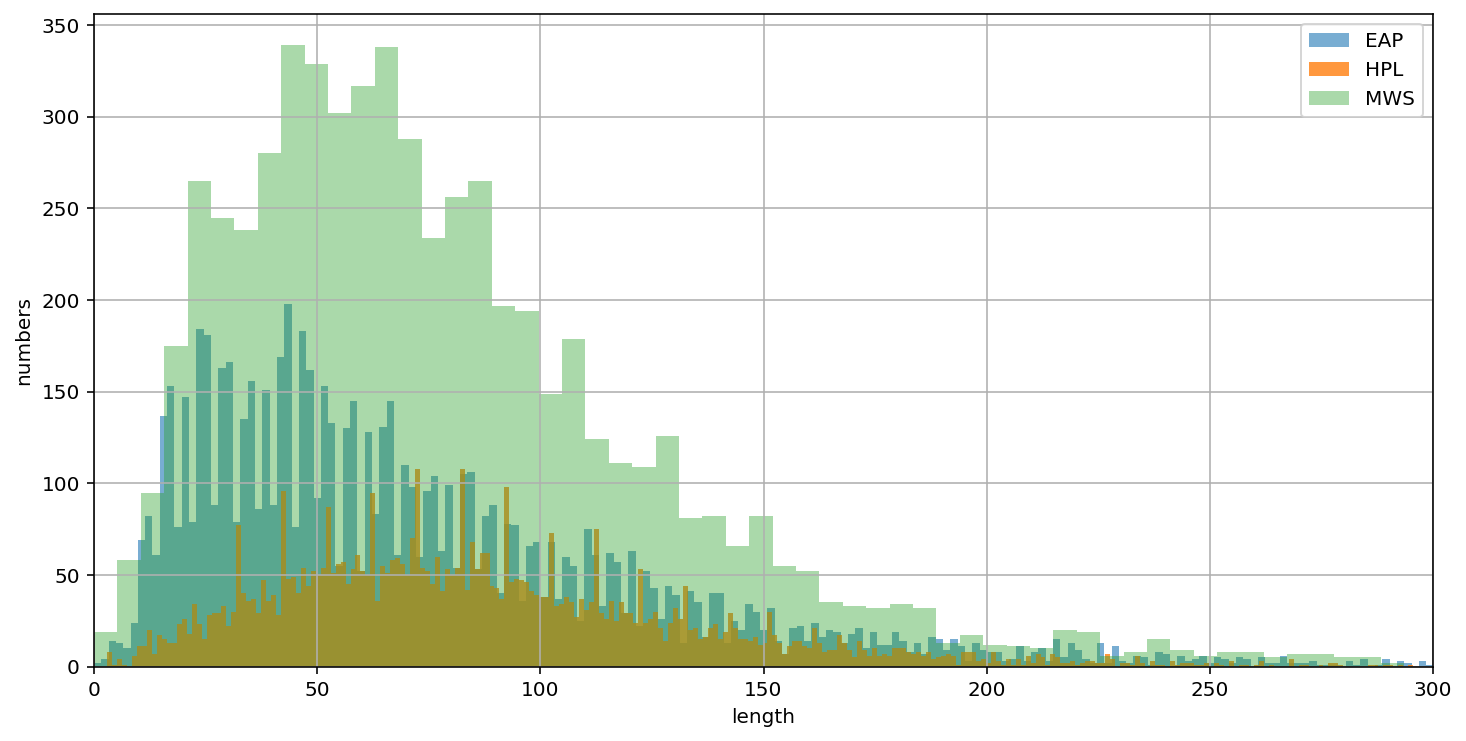

In [32]:
# histogram of text length of each writer
matplotlib.rcParams['figure.figsize'] = (12, 6)
bins = 500
plt.hist(EAP_data['length'], alpha=0.6, bins=bins, label='EAP')
plt.hist(HPL_data['length'], alpha=0.8, bins=bins, label='HPL')
plt.hist(MWS_data['length'], alpha=0.4, bins=bins, label='MWS')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0, 300)
plt.grid()
plt.show()

# Top words of each writer and their count

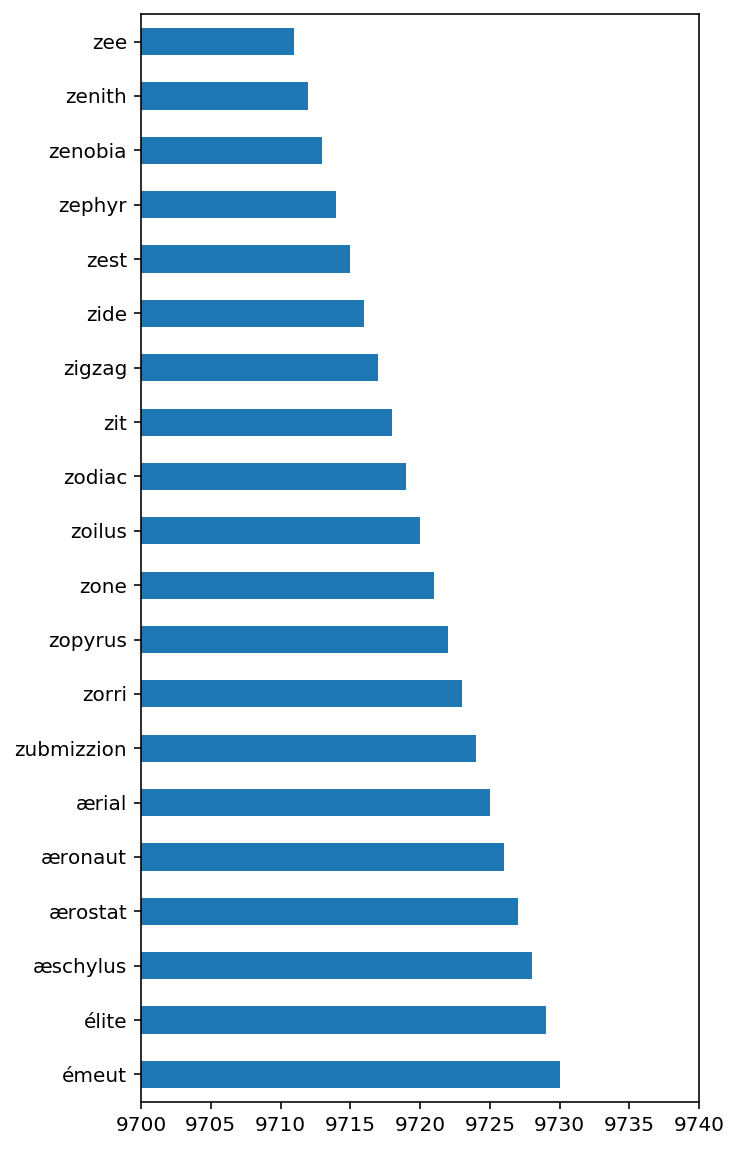

In [34]:
# create the object of tfid vectorizer
EAP_tfid_vectorizer = TfidfVectorizer('english')
# fit the vectorizer using the text data
EAP_tfid_vectorizer.fit(EAP_data['text'])
# collect the vocabulary items used in the vectorizer
EAP_dictionary = EAP_tfid_vectorizer.vocabulary_.items()

# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in EAP_dictionary:
    vocab.append(key)
    count.append(value)
# store the count in pandas dataframe with vocab as index
EAP_vocab = pd.Series(count, index=vocab)
# sort
EAP_vocab = EAP_vocab.sort_values(ascending=False)
# plot
top_vocab = EAP_vocab.head(20)
top_vocab.plot(kind = 'barh', figsize = (5, 10), xlim = (9700, 9740))

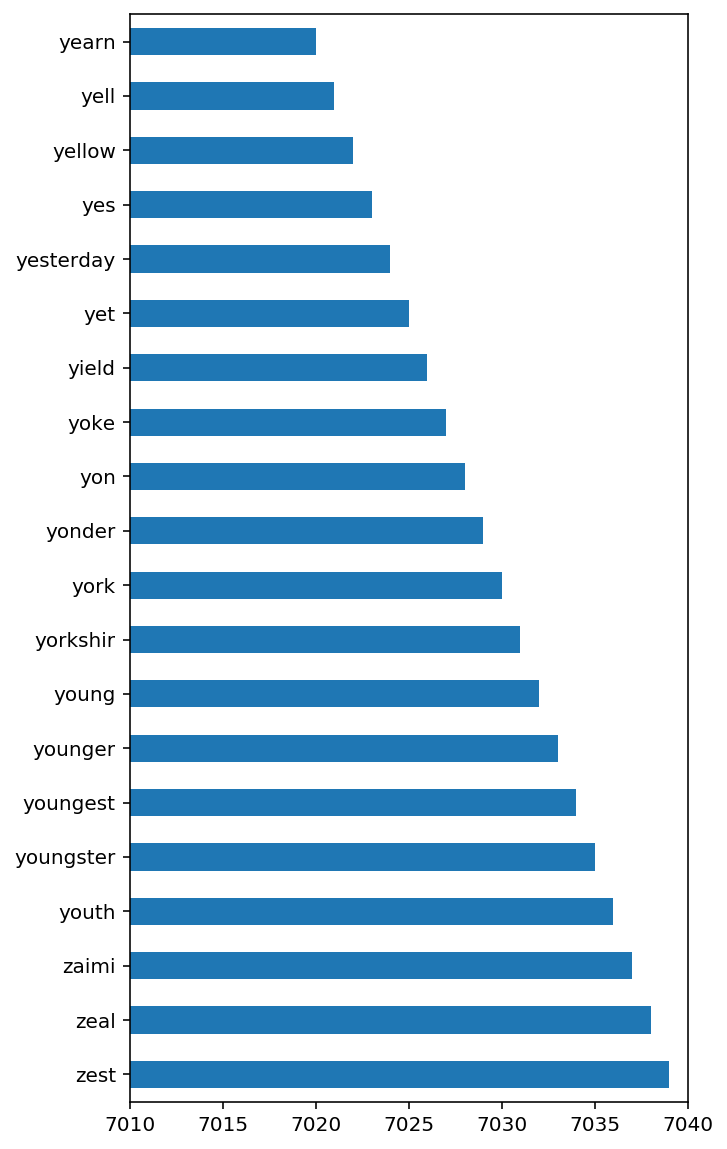

In [36]:
# create the object of tfid vectorizer
MWS_tfid_vectorizer = TfidfVectorizer('english')
# fit the vectorizer using the text data
MWS_tfid_vectorizer.fit(MWS_data['text'])
# collect the vocabulary items used in the vectorizer
MWS_dictionary = MWS_tfid_vectorizer.vocabulary_.items()

# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in MWS_dictionary:
    vocab.append(key)
    count.append(value)
# store the count in pandas dataframe with vocab as index
MWS_vocab = pd.Series(count, index=vocab)
# sort
MWS_vocab = MWS_vocab.sort_values(ascending=False)
# plot
top_vocab = MWS_vocab.head(20)
top_vocab.plot(kind = 'barh', figsize = (5, 10), xlim = (7010, 7040))

# TF-IDF Extraction

In [37]:
# extract the tfid representation matrix of the text data
tfid_matrix = tfid_vectorizer.transform(data['text'])
# collect the tfid matrix in numpy array
array = tfid_matrix.todense()

In [38]:
# store the tf-idf array into df
df = pd.DataFrame(array)
df.head()

0      1      2      3         4      5      6      7      8      9      \
0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0  0.000000    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0  0.000000    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0  0.000000    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0.0    0.0  0.266318    0.0    0.0    0.0    0.0    0.0   

   ...  15132  15133  15134  15135  15136  15137  15138  15139  15140  15141  
0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
3  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
4  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[5 rows x 15142 columns]

# Training Model

In [41]:
df['output'] = data['author']
df['id'] = data['id']
df.head()

0    1    2    3         4    5    6    7    8    9  ...  15134  15135  \
0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
1  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
2  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
3  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
4  0.0  0.0  0.0  0.0  0.266318  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   

   15136  15137  15138  15139  15140  15141  output       id  
0    0.0    0.0    0.0    0.0    0.0    0.0     EAP  id26305  
1    0.0    0.0    0.0    0.0    0.0    0.0     HPL  id17569  
2    0.0    0.0    0.0    0.0    0.0    0.0     EAP  id11008  
3    0.0    0.0    0.0    0.0    0.0    0.0     MWS  id27763  
4    0.0    0.0    0.0    0.0    0.0    0.0     HPL  id12958  

[5 rows x 15144 columns]

In [42]:
features = df.columns.tolist()
output = 'output'
# removing the output and the id from features
features.remove(output)
features.remove('id')

In [43]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import GridSearchCV

# Tuning Multinomial Naive Bayes Classifier

In [44]:
alpha_list1 = np.linspace(0.006, 0.1, 20)
alpha_list1 = np.around(alpha_list1, decimals=4)
alpha_list1

array([0.006 , 0.0109, 0.0159, 0.0208, 0.0258, 0.0307, 0.0357, 0.0406,
       0.0456, 0.0505, 0.0555, 0.0604, 0.0654, 0.0703, 0.0753, 0.0802,
       0.0852, 0.0901, 0.0951, 0.1   ])

In [45]:
# parameter grid
parameter_grid = [{"alpha":alpha_list1}]

In [46]:
# classifier object
classifier1 = MultinomialNB()
# gridsearch object using 4 fold cross validation and neg_log_loss as scoring paramter
gridsearch1 = GridSearchCV(classifier1,parameter_grid, scoring = 'neg_log_loss', cv = 4)
# fit the gridsearch
gridsearch1.fit(df[features], df[output])

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': array([0.006 , 0.0109, 0.0159, 0.0208, 0.0258, 0.0307, 0.0357, 0.0406,
       0.0456, 0.0505, 0.0555, 0.0604, 0.0654, 0.0703, 0.0753, 0.0802,
       0.0852, 0.0901, 0.0951, 0.1   ])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_log_loss', verbose=0)

In [47]:
results1 = pd.DataFrame()
# collect alpha list
results1['alpha'] = gridsearch1.cv_results_['param_alpha'].data
# collect test scores
results1['neglogloss'] = gridsearch1.cv_results_['mean_test_score'].data

Plot of logloss vs alpha

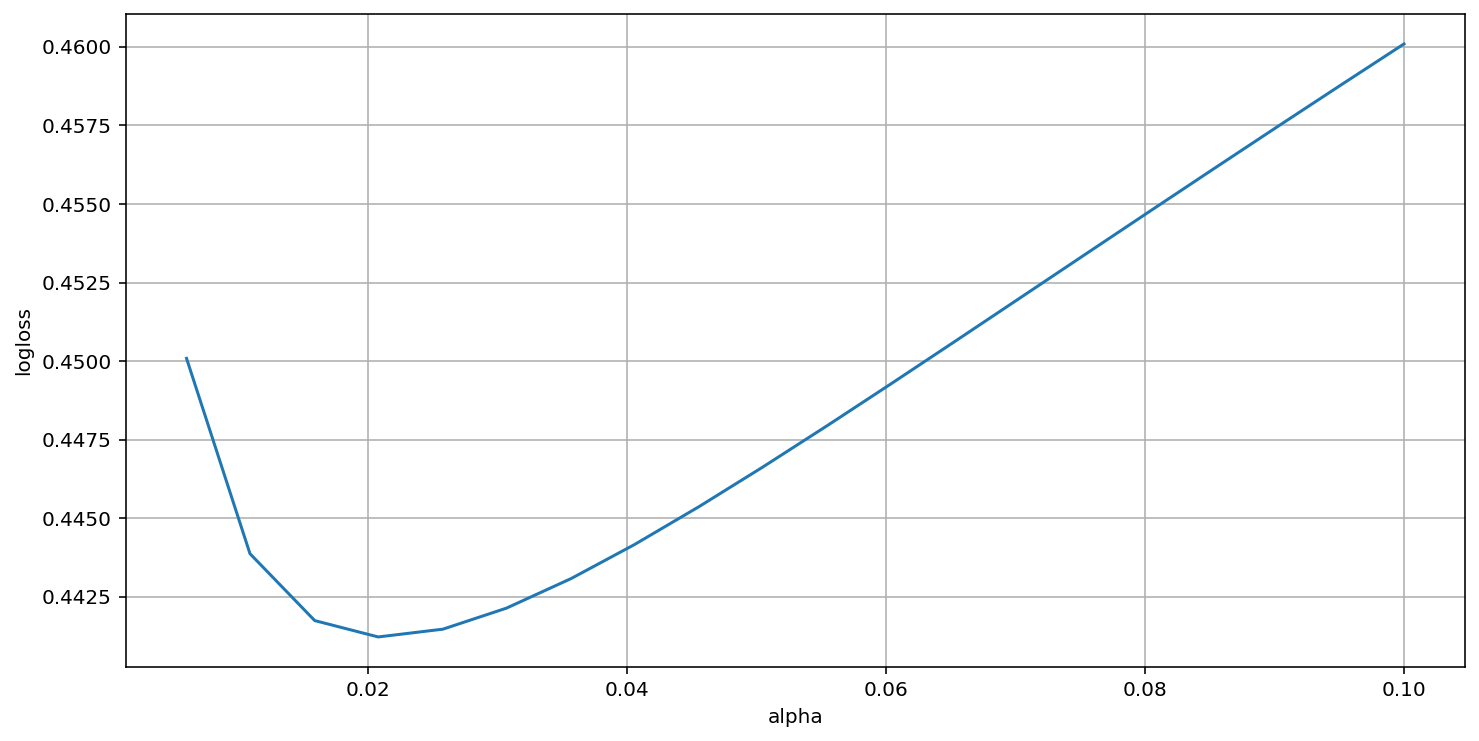

In [48]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(results1['alpha'], -results1['neglogloss'])
plt.xlabel('alpha')
plt.ylabel('logloss')
plt.grid()

In [49]:
print("Best parameter: ",gridsearch1.best_params_)

Best parameter:  {'alpha': 0.0208}


In [50]:
print("Best score: ",gridsearch1.best_score_) 

Best score:  -0.44122437142365833


Tuning Multinomial Naive Bayes Classifier

In [52]:
alpha_list2 = np.linspace(0.006, 0.1, 20)
alpha_list2 = np.around(alpha_list2, decimals=4)
alpha_list2

array([0.006 , 0.0109, 0.0159, 0.0208, 0.0258, 0.0307, 0.0357, 0.0406,
       0.0456, 0.0505, 0.0555, 0.0604, 0.0654, 0.0703, 0.0753, 0.0802,
       0.0852, 0.0901, 0.0951, 0.1   ])

In [53]:
parameter_grid = [{"alpha":alpha_list2}]

In [59]:
# classifier object
classifier2 = MultinomialNB()
# gridsearch object using 4 fold cross validation and neg_log_loss as scoring paramter
gridsearch2 = GridSearchCV(classifier2,parameter_grid, scoring = 'neg_log_loss', cv = 4, n_jobs=16)
# fit the gridsearch
gridsearch2.fit(df[features], df[output])

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='warn', n_jobs=16,
             param_grid=[{'alpha': array([0.006 , 0.0109, 0.0159, 0.0208, 0.0258, 0.0307, 0.0357, 0.0406,
       0.0456, 0.0505, 0.0555, 0.0604, 0.0654, 0.0703, 0.0753, 0.0802,
       0.0852, 0.0901, 0.0951, 0.1   ])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_log_loss', verbose=0)

In [55]:
results2 = pd.DataFrame()
# collect alpha list
results2['alpha'] = gridsearch2.cv_results_['param_alpha'].data
# collect test scores
results2['neglogloss'] = gridsearch2.cv_results_['mean_test_score'].data

Plot of logloss vs alpha

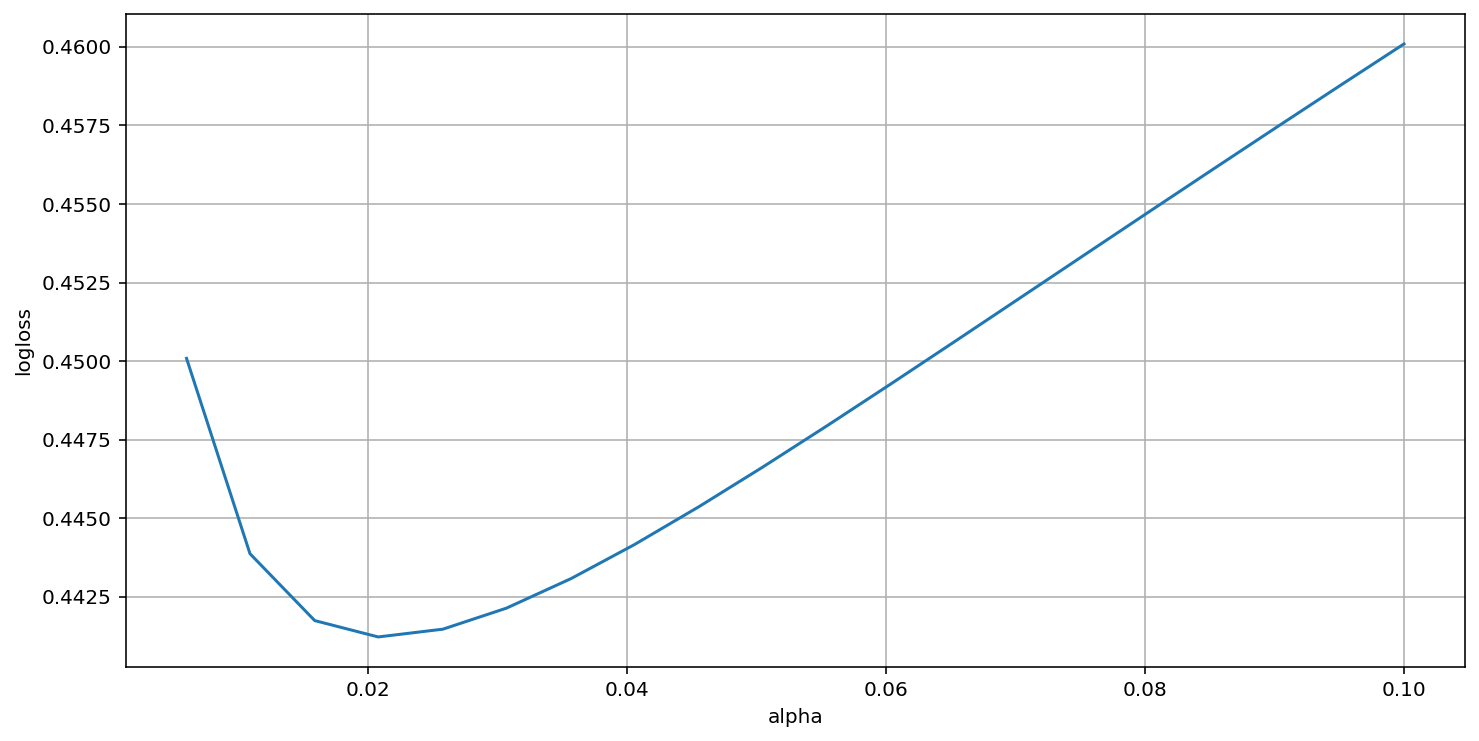

In [56]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(results2['alpha'], -results2['neglogloss'])
plt.xlabel('alpha')
plt.ylabel('logloss')
plt.grid()

In [57]:
print("Best parameter: ",gridsearch2.best_params_)

Best parameter:  {'alpha': 0.0208}


In [58]:
print("Best score: ",gridsearch2.best_score_)

Best score:  -0.44122437142365833
